##### Welcome to this project... 
    I have divided this project in various steps,where each step will show the tasks.In some of the steps, the evaluation   after the step has been written. These evaluations help not only to understand the steps but  also give the direction of  the next step.Sometimes,the useful comments have been written within the step, which will explain the logic behind the    line of code.At last, the results of the various algorithms have been compared.
##### Let's begin...

#### Step 1:
Import all the necessary libraries and load the data. 
After loading the data,analyse it briefly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
df = pd.read_csv('glassdoor_jobs.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.shape

(956, 14)

In [5]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

familiarize with data

In [6]:
df.iloc[0].T

Job Title                                               Data Scientist
Salary Estimate                             $53K-$91K (Glassdoor est.)
Job Description      Data Scientist\r\nLocation: Albuquerque, NM\r\...
Rating                                                             3.8
Company Name                                  Tecolote Research\r\n3.8
Location                                               Albuquerque, NM
Headquarters                                                Goleta, CA
Size                                             501 to 1000 employees
Founded                                                           1973
Type of ownership                                    Company - Private
Industry                                           Aerospace & Defense
Sector                                             Aerospace & Defense
Revenue                                      $50 to $100 million (USD)
Competitors                                                         -1
Name: 

Checking whether all the category has similar pattern of data or not   

In [7]:
df['Salary Estimate'].iloc[0], df['Salary Estimate'].iloc[24],df['Salary Estimate'].iloc[161],df['Salary Estimate'].iloc[197]

('$53K-$91K (Glassdoor est.)',
 '-1',
 'Employer Provided Salary:$120K-$145K',
 '$17-$24 Per Hour(Glassdoor est.)')

#### Step_1 Evaluation:
1. There are 14 features and 956 samples.
2. In this 14 features, 12 features are categorical data and 2 features are numerical data.
3. Our Label data 'Salary Estimate' is in categorical data. As it is the regression task, we need to convert it somehow numerical data.
4. Where the data is not available in particular category, automatically it has considered value '-1'. In addition, sometime data pattern has also changed.

#### Step 2:
Data Cleaning and feature generation
1. Remove all those samples, which have different useless data pattern inside the particular feature. 
2. Create a new feature for different useful data pattern
3. Salary Estimate : Convert categorical data into the numerical data, by taking mean from the maximum salary and minimum salary.
4. Company Name : Take only name of the company
5. Location : Seperate states and cities
6. Job Description : Seperate all the information in different features
7. Founded : Convert this feature in to the age of the company
8. Job title : Seperate all the information in different features

In [8]:
df = df[df['Salary Estimate'] != '-1']

In [9]:
df['hourly'] = df['Salary Estimate'].apply(lambda x : 1 if 'per hour' in x.lower() else 0)

In [10]:
df['employer_provided'] = df['Salary Estimate'].apply(lambda x : 1 if 'employer provided salary' in x.lower() else 0)

In [11]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [12]:
salary[0],salary[48],salary[197]

('$53K-$91K ', 'Employer Provided Salary:$150K-$160K', '$17-$24 Per Hour')

In [13]:
salary_range = salary.apply(lambda x : x.lower().replace('per hour','').replace('employer provided salary:','').replace('k','').replace('$',''))

In [14]:
salary_range[0],salary_range[48],salary_range[197]

('53-91 ', '150-160', '17-24 ')

In [15]:
df['min_salary'] = salary_range.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = salary_range.apply(lambda x: int(x.split('-')[1]))

It It is always important that comparision should be done on the same reference scale.
In our case, some times wage in hours and sometime it is the annual amount. We need to convert hourly wage in to annual wage.

In [16]:
df['min_salary'] = df.apply(lambda x : x.min_salary*2 if x.hourly == 1 else x.min_salary,axis = 1)
df['max_salary'] = df.apply(lambda x : x.max_salary*2 if x.hourly == 1 else x.max_salary,axis = 1)
df['avg_salary'] = (df['max_salary'] + df['min_salary'])/2
df[['min_salary','max_salary','avg_salary']][:3]

,min_salary,max_salary,avg_salary
0,53,91,72.0
1,63,112,87.5
2,80,90,85.0


In [17]:
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis = 1)
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\r\n',''))
df['company_txt'][:3]

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
Name: company_txt, dtype: object

In [18]:
df['job_state'] = df['Location'].apply(lambda x : x.split(',')[1])
df['job_state'] = df['job_state'].apply(lambda x : x.strip() if  x.strip().lower() != 'los angeles' else 'CA')
df['job_state'][:3]

0    NM
1    MD
2    FL
Name: job_state, dtype: object

In [19]:
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0,axis = 1)
df['same_state'][:3]

0    0
1    0
2    1
Name: same_state, dtype: int64

In [20]:
df['age'] = df.Founded.apply(lambda x: x if x < 1 else 2020 - x)
df['age'][:3]

0    47
1    36
2    10
Name: age, dtype: int64

We will try to find some key words in job description such as 'Python' , 'R studio' , 'spark' , 'asw' , 'excel' and consider it as a new feature

In [21]:
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['python_yn'].value_counts()

1    392
0    350
Name: python_yn, dtype: int64

In [22]:
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio'  in x.lower() or 'r-studio' in x.lower() else 0)
df['R_yn'].value_counts()

0    740
1      2
Name: R_yn, dtype: int64

In [23]:
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark'  in x.lower()  else 0)
df['spark'].value_counts()

0    575
1    167
Name: spark, dtype: int64

In [24]:
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws'  in x.lower()  else 0)
df['aws'].value_counts()

0    566
1    176
Name: aws, dtype: int64

In [25]:
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel'  in x.lower()  else 0)
df['excel'].value_counts()

1    388
0    354
Name: excel, dtype: int64

One can make feautres for job title such that 'data scientist' , 'data engineer' , 'analyst' , 'machine learning', 'manager' or 'director'

In [26]:
def title_simplifir(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

One can make feautres based on seniority from given prefix such that 'sr' , 'lead' , 'principal' or 'jr'

In [27]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower():
        return 'junior'
    else:
        return 'na'

In [28]:
df['job_simplified'] = df['Job Title'].apply(title_simplifir)

In [29]:
df['seniority'] = df['Job Title'].apply(seniority)

One can use the length of job description as a feature

In [30]:
df['desc_len'] = df['Job Description'].apply(lambda x:len(x))

Number of competitors also can be a feature

In [31]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0) 

In [32]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simplified,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3495,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2748,3


In [33]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simplified        object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [34]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


#### Step 3:
Exploratory Data Analysis

First, We analyse the distribution of data over various numeric features (excluding features with binary outputs) using histogram and boxplot.

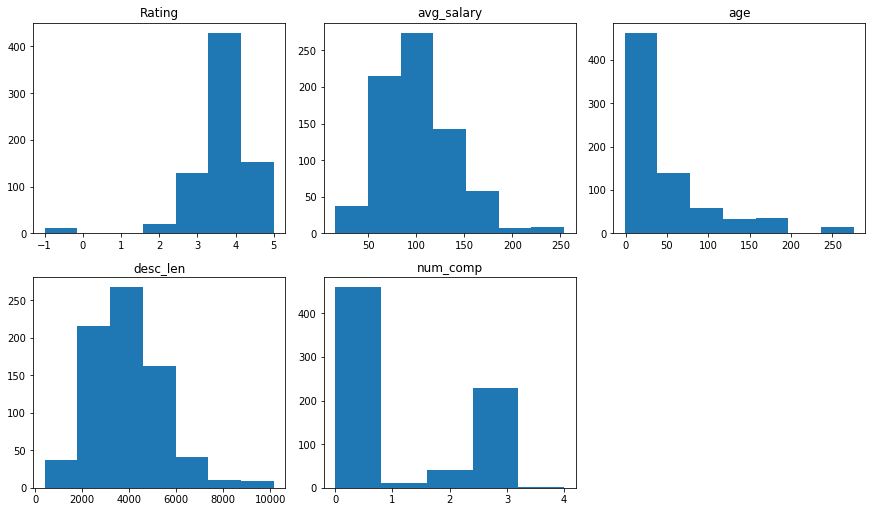

In [35]:
fig, axs = plt.subplots(2, 3,figsize=(12, 7),constrained_layout=True)
axs[0,0].hist(df['Rating'],7)
axs[0, 0].set_title('Rating')
axs[0, 1].hist(df['avg_salary'],7)
axs[0, 1].set_title('avg_salary')
axs[0, 2].hist(df['age'],7)
axs[0, 2].set_title('age')
axs[1, 0].hist(df['desc_len'],7)
axs[1, 0].set_title('desc_len')
axs[1, 1].hist(df['num_comp'],5)
axs[1, 1].set_title('num_comp')
fig.delaxes(axs[1,2])

In this histogram plot, we can observe that Rating, Avg_salary and desc_len have 'Normal Distribution', while age has  'Exponential Distribution'. Apart from that, value ranges in in the feature have big differences,for example sometimes 2000,4000...and sometimes 50,100,...To deal with this, we need to scale the data. 

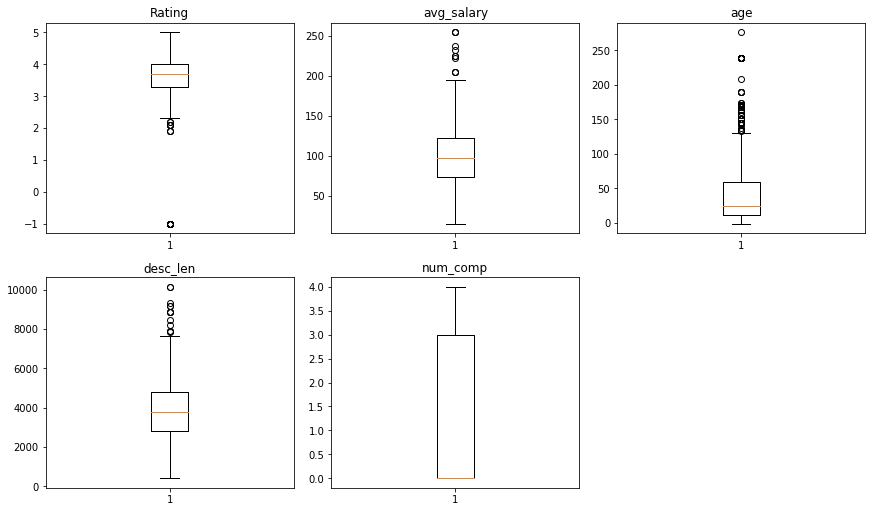

In [36]:
fig, axs = plt.subplots(2, 3,figsize=(12, 7),constrained_layout=True)
axs[0,0].boxplot(df['Rating'])
axs[0, 0].set_title('Rating')
axs[0, 1].boxplot(df['avg_salary'])
axs[0, 1].set_title('avg_salary')
axs[0, 2].boxplot(df['age'])
axs[0, 2].set_title('age')
axs[1, 0].boxplot(df['desc_len'])
axs[1, 0].set_title('desc_len')
axs[1, 1].boxplot(df['num_comp'])
axs[1, 1].set_title('num_comp')
fig.delaxes(axs[1,2])

In this boxplot,we can observe that 'age' feature has so many outliers as compare to the others.  

Second, we try to find the correlation among above features.

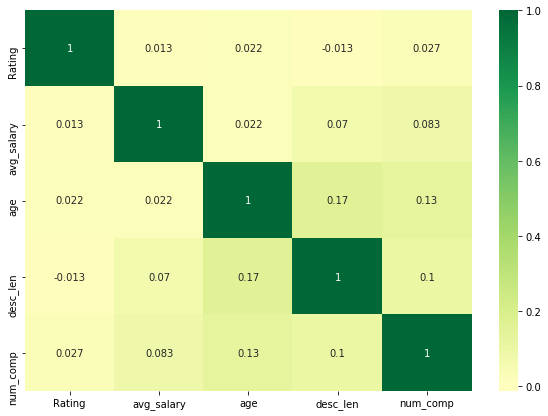

In [37]:
plt.figure(figsize=(10,7))
g = sns.heatmap(df[['Rating','avg_salary','age','desc_len','num_comp']].corr(),annot=True,center=0,cmap='RdYlGn',annot_kws={"size": 10})
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

Third, Categorical features also should be analysed using Bar chart by value counts.
For that, we will make seperate those in two different categories, one dataframe will contain features with less unique values(df_1) and other dataframe will contain features with more unique values(df_2).For df_2, I will show top 20 value counts of each feature just for better evaluation.

In [38]:
df_1 = df[['Size','Type of ownership','Sector', 'Revenue','same_state', 'python_yn', 'R_yn','spark', 'aws', 'excel', 'job_simplified', 'seniority']]
df_2 = df[['Location', 'Headquarters', 'company_txt','Industry', 'job_state']]

graph for Size: total = 9


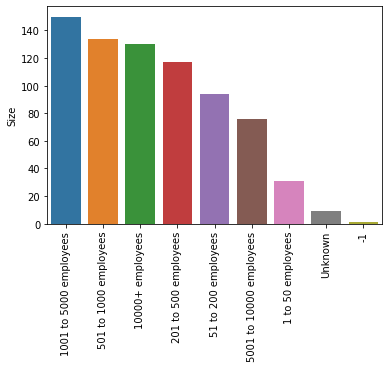

graph for Type of ownership: total = 11


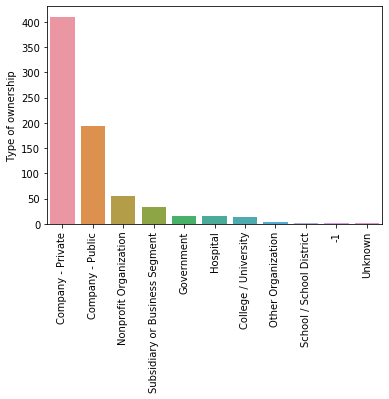

graph for Sector: total = 25


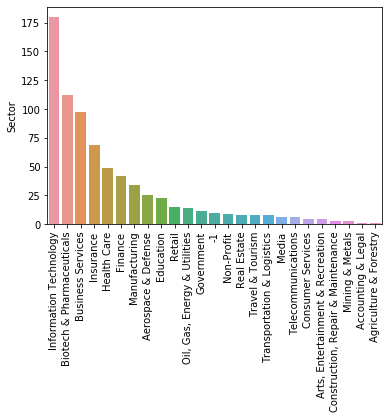

graph for Revenue: total = 14


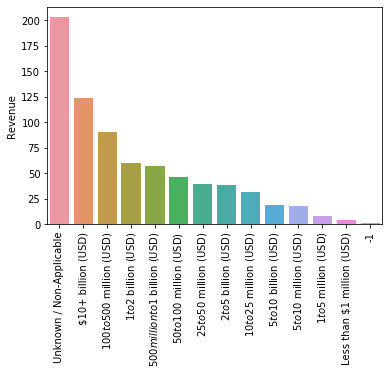

graph for same_state: total = 2


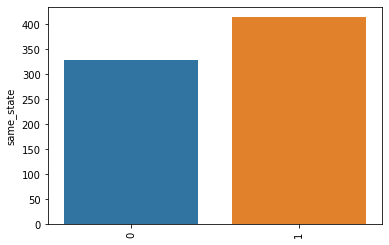

graph for python_yn: total = 2


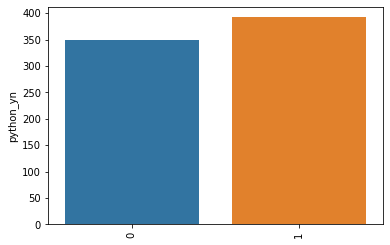

graph for R_yn: total = 2


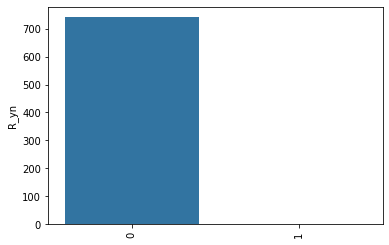

graph for spark: total = 2


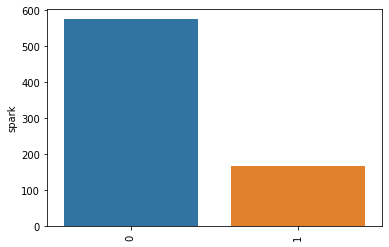

graph for aws: total = 2


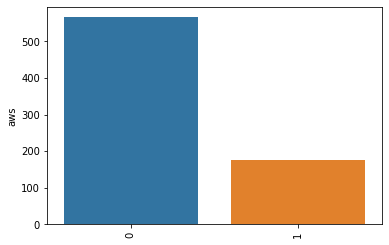

graph for excel: total = 2


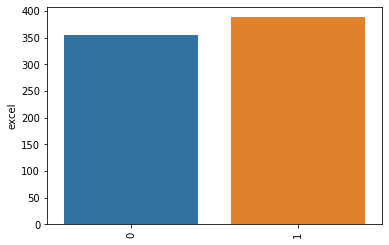

graph for job_simplified: total = 7


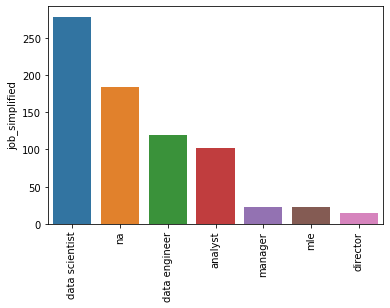

graph for seniority: total = 3


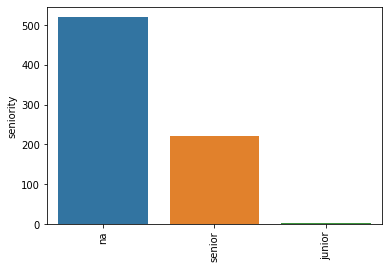

In [39]:
for i in df_1.columns:
    df_1_num = df_1[i].value_counts()
    print("graph for %s: total = %d" % (i, len(df_1_num)))
    chart = sns.barplot(x=df_1_num.index, y=df_1_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


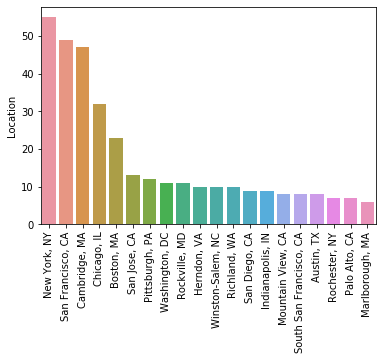

graph for Headquarters: total = 20


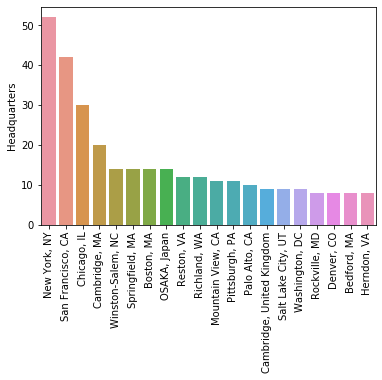

graph for company_txt: total = 20


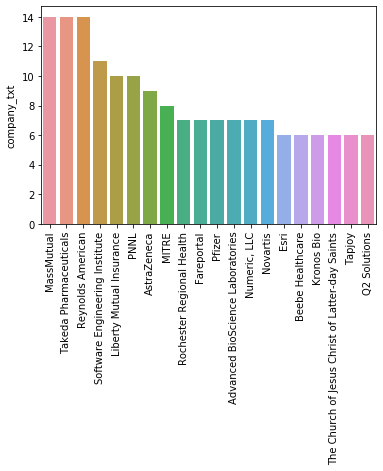

graph for Industry: total = 20


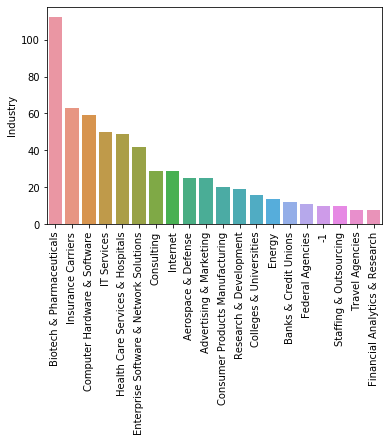

graph for job_state: total = 20


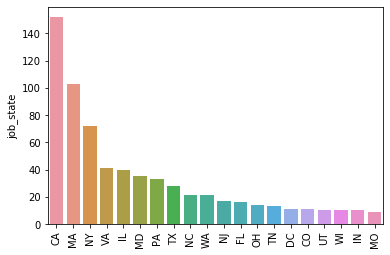

In [40]:
for i in df_2.columns:
    cat_num = df_2[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Fourth , Compare the position and seniority level with average salary, so that we can understand the real world situation.

In [41]:
table_1 = pd.pivot_table(df, index = ['job_simplified','seniority'], values = ['avg_salary'])
table_2 = pd.pivot_table(df, index = ['job_simplified','seniority'], values = ['avg_salary'],aggfunc={'avg_salary': 'count'})
table_3 = pd.merge(table_1, table_2, 'left', on = ["job_simplified", "seniority"] )
table_3

avg_salary_x  avg_salary_y
job_simplified seniority                            
analyst        junior        56.500000             1
               na            61.155405            74
               senior        80.092593            27
data engineer  na            96.701220            82
               senior       124.689189            37
data scientist junior       106.500000             1
               na           107.043011           186
               senior       138.956522            92
director       na           168.607143            14
manager        na            84.022727            22
mle            na           119.133333            15
               senior       142.071429             7
na             na            78.500000           127
               senior       109.061404            57

##### avg_salary_x = mean of salary , avg_salary_y = count

From this table, we can compare various jobs with average salary and number of vacancies for that job

Fifth, Compare the states with job role based on average salary and number of vacancies

In [42]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
table_4 = pd.pivot_table(df, index = ['job_state','job_simplified'], values = ['avg_salary'])
table_5 = pd.pivot_table(df, index = ['job_state','job_simplified'], values = ['avg_salary'],aggfunc={'avg_salary': 'count'})
table_6 = pd.merge(table_4, table_5, 'left', on = ["job_state", "job_simplified"])
table_6

avg_salary_x  avg_salary_y
job_state job_simplified                            
AL        analyst            62.200000             5
          data engineer      65.000000             1
          na                 43.750000             2
AZ        analyst            55.000000             1
          data engineer      79.500000             5
          data scientist     69.500000             1
          na                124.500000             2
CA        analyst            85.250000            18
          data engineer     129.540000            25
          data scientist    142.522059            68
          manager            80.611111             9
          mle               177.300000             5
          na                 99.907407            27
CO        analyst            29.500000             1
          data engineer      99.000000             3
          data scientist    108.666667             3
          mle               100.500000             1
          na                 63.000000             3
CT        data scientist     84.000000             2
          na                 62.500000             3
DC        analyst            63.500000             2
          data engineer      85.000000             4
          data scientist    149.000000             5
DE        na                 55.000000             6
FL        analyst            47.500000             6
          data engineer      91.833333             3
          data scientist     97.357143             7
GA        data scientist     81.333333             3
          na                 80.000000             3
IA        analyst            43.000000             2
          data engineer     102.833333             3
ID        analyst            56.250000             2
IL        analyst            66.500000             3
          data engineer      96.125000             8
          data scientist    117.233333            15
          director          221.750000             6
          mle               133.000000             2
          na                 57.166667             6
IN        data engineer     114.500000             4
          data scientist     84.500000             2
          na                 69.000000             4
KS        mle                87.000000             3
KY        data scientist     84.000000             2
          na                103.500000             4
LA        analyst            48.000000             1
          data engineer      70.500000             2
          na                 40.000000             1
MA        analyst            59.125000             4
          data engineer     107.291667            12
          data scientist    113.750000            30
          director          117.833333             6
          manager            71.900000             5
          na                110.010870            46
MD        analyst            80.666667             3
          data engineer     109.000000             3
          data scientist    109.115385            13
          na                 88.750000            16
MI        data scientist    106.625000             4
          manager            87.500000             2
MN        analyst            76.000000             1
          data engineer      95.000000             1
MO        analyst            61.000000             2
          data scientist    127.666667             3
          manager            40.500000             1
          na                 72.333333             3
NC        data engineer     104.250000             6
          data scientist    117.000000             3
          na                 90.916667            12
NE        na                 53.500000             4
NJ        analyst            83.583333             6
          data engineer     112.000000             2
          data scientist    106.875000             4
          director          161.500000             2
          manager           109.500000             

It gives very detailed idea about the average salary for the different job role and number of vacancies for that in various states. 

Sixth, Let's find the top 10 salary giving states and top 10 number of vacancies for job role as data scientist.

In [43]:
table_7 = pd.pivot_table(df[df.job_simplified == 'data scientist'], index = 'job_state', values = 'avg_salary')
table_8 = pd.pivot_table(df[df.job_simplified == 'data scientist'], index = 'job_state', values = 'avg_salary',aggfunc={'avg_salary': 'count'})
table_9 = pd.merge(table_7, table_8, 'left', on = ["job_state"]).sort_values('avg_salary_x', ascending = False)

In [44]:
table_9[:10]

,avg_salary_x,avg_salary_y
job_state,,
DC,149.000000,5
CA,142.522059,68
UT,140.500000,3
MO,127.666667,3
IL,117.233333,15
NC,117.000000,3
NY,115.250000,40
MA,113.750000,30
WI,113.500000,3


In [45]:
table_9.sort_values('avg_salary_y', ascending = False)[:10]

,avg_salary_x,avg_salary_y
job_state,,
CA,142.522059,68
NY,115.250000,40
MA,113.750000,30
VA,108.416667,18
WA,99.764706,17
IL,117.233333,15
TX,100.730769,13
MD,109.115385,13
FL,97.357143,7


The result shows that, Maximum salary giving state is 'DC' with Avg. value 149K USD, but 5 vacancies, where as Maximum vacancies(68) in 'CA' with second most salary giving state with avg. value 142.522K USD.

Seventh, Let's try to find top 5 avg salary with number of vacancies in various other features.  

In [46]:
df_pivots = df[['Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided','Rating', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [47]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        
        table_a = pd.pivot_table(df_pivots,index =i, values = 'avg_salary')
        table_b = pd.pivot_table(df_pivots,index =i, values = 'avg_salary',aggfunc={'avg_salary': 'count'})
        table_c = pd.merge(table_a, table_b, 'left', on = [i]).sort_values('avg_salary_x', ascending = False)
        table_d = table_c.sort_values('avg_salary_y', ascending = False)
        print(f'feature name : {i} \n Top 5 Avg. Salary in feature : {i} \n {table_c[:5]} \n Top 5 vacancies in feature : {table_d[:5]} \n')

feature name : Industry 
 Top 5 Avg. Salary in feature : Industry 
                                           avg_salary_x  avg_salary_y
Industry                                                            
Other Retail Stores                            163.500             1
Motion Picture Production & Distribution       146.000             1
Financial Analytics & Research                 145.125             8
Health, Beauty, & Fitness                      139.500             1
Telecommunications Services                    131.500             4 
 Top 5 vacancies in feature :                                   avg_salary_x  avg_salary_y
Industry                                                    
Biotech & Pharmaceuticals           112.098214           112
Insurance Carriers                  105.626984            63
Computer Hardware & Software        115.194915            59
IT Services                         102.840000            50
Health Care Services & Hospitals     76.530612      

#### Step 4:
Model Preparation

For this step, we will perform following primarily points:
1. We need to select relevent number of features.For that, We will drop all those categorical features, which will have so many unique values. At the same time, we will drop numerial feature such as 'Founded' due to the same reason.In addition, we will also remove feature 'R_yn' becauese the value count of 0 is very big than value count for 1.
2. To use categorical information, We need to create some dummy data. To generate those dummy data, intially, we need to do label encoding.In this method, we will assign numbers to the unique values of particular feature. Afte that, we will apply one hot encoding, where those assigned numbers will be converted in new feature. This whole process can be done with one function called, pandas.get_dummies(df).
3. We need to separate train data and test data.

In [48]:
df_model = df.drop(columns=['Job Title','Salary Estimate','Job Description','Company Name','Location','Headquarters','Founded','Competitors','min_salary','max_salary','company_txt','R_yn'])
df_model.head(5)

,Rating,Size,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided,avg_salary,job_state,same_state,age,python_yn,spark,aws,excel,job_simplified,seniority,desc_len,num_comp
0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,72.0,NM,0,47,1,0,0,1,data scientist,na,2555,0
1,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,87.5,MD,0,36,1,0,0,0,data scientist,na,4828,0
2,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,85.0,FL,1,10,1,1,0,1,data scientist,na,3495,0
3,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,76.5,WA,1,55,1,0,0,0,data scientist,na,3926,3
4,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,114.5,NY,1,22,1,0,0,1,data scientist,na,2748,3


In [49]:
df_dum = pd.get_dummies(df_model)
df_dum.shape

(742, 178)

In [50]:
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(593, 177) (149, 177) (593,) (149,)


#### Step 5:
Models

In this step, we are going to build the models such as multi linear regression, lasso regression, random forest and then, we will tune model by GridsearchCV.

###### model 1: Multi-linear regression model using Sklearn 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.763805077648016

###### model 2: Lasso regression model using Sklearn

In [52]:
from sklearn.linear_model import Lasso
lm_l = Lasso()
print(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

-21.020736669277465


The default alpha value for Lasso regression is 1. We will find it by try and error.

In [53]:
Alpha = np.array([])
Error = np.array([])
for i in range(1,1000):
    alpha = i/100
    lm_l = Lasso(alpha=alpha)
    Error = np.append(Error,(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))))
    Alpha = np.append(Alpha,alpha)
print(f' best alpha value is {Alpha[Error == Error.max()].item()} with error value {Error.max()}')

lm_l = Lasso(alpha=Alpha[Error == Error.max()].item())
lm_l.fit(X_train, y_train)

 best alpha value is 0.14 with error value -19.35477677789505
-19.35477677789505


###### model 3 : Random Forest model using Sklearn

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-15.949959835239023

###### Tune models using GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'mae'),
  

In [56]:
gs.best_score_

-14.809302979201798

In [57]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

So far, Random Forest has minimum neg_mean_absolute_error while training.

#### Step 6:
Model's Performace analysis

In [58]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [59]:
from sklearn import metrics
lm_mean_absolute_error = metrics.mean_absolute_error(y_test,tpred_lm)
lml_mean_absolute_error = metrics.mean_absolute_error(y_test,tpred_lml)
rf_mean_absolute_error= metrics.mean_absolute_error(y_test,tpred_rf)
lm_mean_squared_error = metrics.mean_squared_error(y_test,tpred_lm)
lml_mean_squared_error = metrics.mean_squared_error(y_test,tpred_lml)
rf_mean_squared_error= metrics.mean_squared_error(y_test,tpred_rf)
lm_sqrt_mean_absolute_error = np.sqrt(metrics.mean_absolute_error(y_test,tpred_lm))
lml_sqrt_mean_absolute_error = np.sqrt(metrics.mean_absolute_error(y_test,tpred_lml))
rf_sqrt_mean_absolute_error= np.sqrt(metrics.mean_absolute_error(y_test,tpred_rf))
print(f'Model | Mean_absolute_error | Mean_squared_error | Square root mean_squared_error \n Linear Regression | {lm_mean_absolute_error} | {lm_mean_squared_error} | {lm_sqrt_mean_absolute_error} \n Lasso Regression | {lml_mean_absolute_error} | {lml_mean_squared_error} | {lml_sqrt_mean_absolute_error} \n Random Forest | {rf_mean_absolute_error} | {rf_mean_squared_error} | {rf_sqrt_mean_absolute_error}')

Model | Mean_absolute_error | Mean_squared_error | Square root mean_squared_error 
 Linear Regression | 18.865433167473878 | 687.7448326647097 | 4.343435640995947 
 Lasso Regression | 19.742362906634053 | 651.3556621797281 | 4.443237885442783 
 Random Forest | 11.49619686800895 | 363.1667312950534 | 3.390604203974411


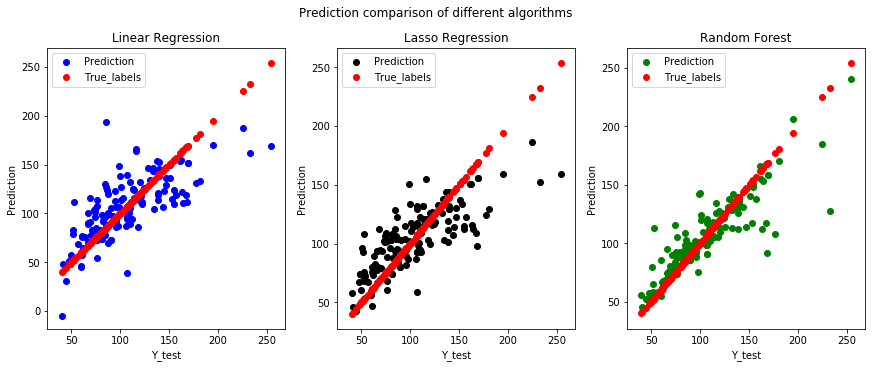

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12, 5),sharex=True,constrained_layout=True)
fig.suptitle('Prediction comparison of different algorithms')
ax1.scatter(y_test,tpred_lm,c = 'blue',label='Prediction')
ax1.scatter(y_test,y_test,c='red',label='True_labels')
ax1.set_title('Linear Regression')
ax1.set(xlabel='Y_test', ylabel='Prediction')
ax1.legend()

ax2.scatter(y_test,tpred_lml,c='black',label='Prediction')
ax2.scatter(y_test,y_test,c='red',label='True_labels')
ax2.set_title('Lasso Regression')
ax2.set(xlabel='Y_test', ylabel='Prediction')
ax2.legend()

ax3.scatter(y_test,tpred_rf,c='green',label='Prediction')
ax3.scatter(y_test,y_test,c='red',label='True_labels')
ax3.set_title('Random Forest')
ax3.set(xlabel='Y_test',ylabel='Prediction')
ax3.legend()

Random Forest predictions are quite closer to the targets as compared with other algorithms.

[Text(0, 0.5, 'Density')]

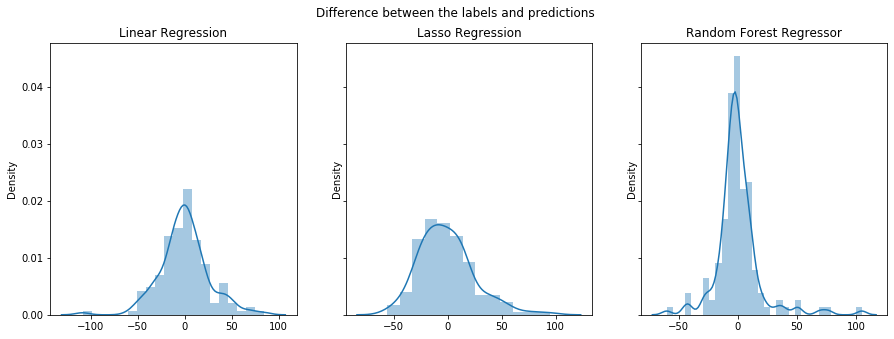

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Difference between the labels and predictions')
sns.distplot(y_test-tpred_lm,ax=ax1)
ax1.set_title('Linear Regression')
ax1.set(ylabel='Density')
sns.distplot(y_test-tpred_lml,ax=ax2)
ax2.set_title('Lasso Regression')
ax2.set(ylabel='Density')
sns.distplot(y_test-tpred_rf,ax=ax3)
ax3.set_title('Random Forest Regressor')
ax3.set(ylabel='Density')

Similarly, difference between the targets and predictions are much less in Random Forest algorithm.In addition, the standard deviation value will be less for that algorithm as compared with others. So we can say that random forest algorithm has dense data towards zero difference.  

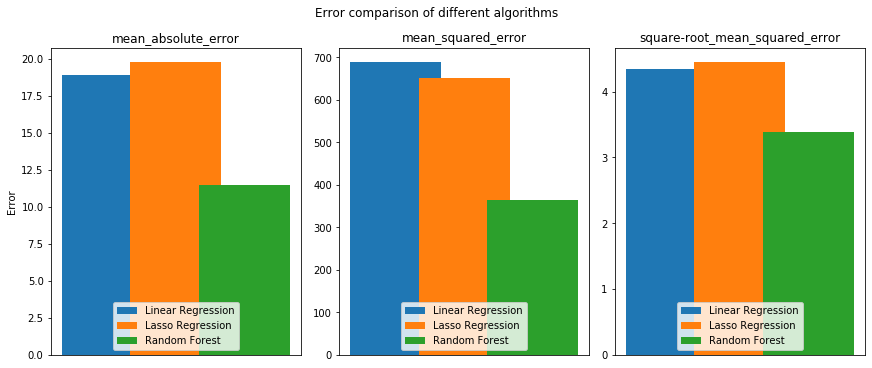

In [62]:
width = 0.35
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12, 5),sharex=True,constrained_layout=True)
fig.suptitle('Error comparison of different algorithms')
ax1.bar(1 - width,lm_mean_absolute_error, width,label = 'Linear Regression')
ax1.bar(1 - width/4,lml_mean_absolute_error, width,label = 'Lasso Regression')
ax1.bar(1 + width/2,rf_mean_absolute_error, width,label = 'Random Forest')
ax1.set_title('mean_absolute_error')
ax1.set(ylabel='Error')
ax1.set_xticks([])
ax1.legend(loc='lower center')
ax2.bar(1 - width,lm_mean_squared_error, width,label = 'Linear Regression')
ax2.bar(1 - width/4,lml_mean_squared_error, width,label = 'Lasso Regression')
ax2.bar(1 + width/2,rf_mean_squared_error, width,label = 'Random Forest')
ax2.set_title('mean_squared_error')
ax2.set_xticks([])
ax2.legend(loc='lower center')
ax3.bar(1 - width,lm_sqrt_mean_absolute_error, width,label = 'Linear Regression')
ax3.bar(1 - width/4,lml_sqrt_mean_absolute_error, width,label = 'Lasso Regression')
ax3.bar(1 + width/2,rf_sqrt_mean_absolute_error, width,label = 'Random Forest')
ax3.set_title('square-root_mean_squared_error')
ax3.set_xticks([])
ax3.legend(loc='lower center')

Based on all the plots, we can say that, Random Forest has less error values compared with other algorithms.

#### Step 7:
Future Work
1. Deep Neural Networks will be performed.
2. Deployment of the trained model in production will be generated.

###  Conclusion : 
#### After observing all graphs ,for this dataset Random Forest Regressor performs better than Linear Regresson. 

Here,the project ends. I hope, you have gained some valuable information.

### Thank You...!
#### See you in the next project... 